## Find out the age of Abalone from physical measurements

### Importing the relevant Libraries

In [1]:
# Using sklearn to apply regression
import numpy as np
import pandas as pd
import statsmodels.api as sm

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set()

### Data Preprocessing
#### Loading Data

In [2]:
# Load the data from a .csv in the same folder
raw_data = pd.read_csv('abalone.data.csv')

# Let's explore the top 5 rows of the df
raw_data.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Rings determine the abalone's age by adding value + 1.5 gives age in years (eg. 4 = 5.5 years)

In [3]:
raw_data.describe(include = 'all')

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000


#### Determining the variables of interest
We understand that the abalones age depends on the number of rings on the abalone added with 1.5. <br>
Therefore let us first calculate the age of the abalones by adding 1.5 to the number of rings and than dropping the 'Rings' column.

In [4]:
raw_data['Age'] = raw_data['Rings'] + 1.5
data = raw_data.drop('Rings', axis = 1)
data.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


#### Dealing with missing values

In [5]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

[There is no missing values in this study] <br>

### Data Exploration
By plotting a histogram, we are able to show how each column is in its skewness.<br>
We have also calculated the skewness for each physiological input.<br>

In [6]:
data.skew(axis = 0, skipna = True)

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole Weight      0.530959
Shucked Weight    0.719098
Viscera Weight    0.591852
Shell Weight      0.620927
Age               1.114102
dtype: float64

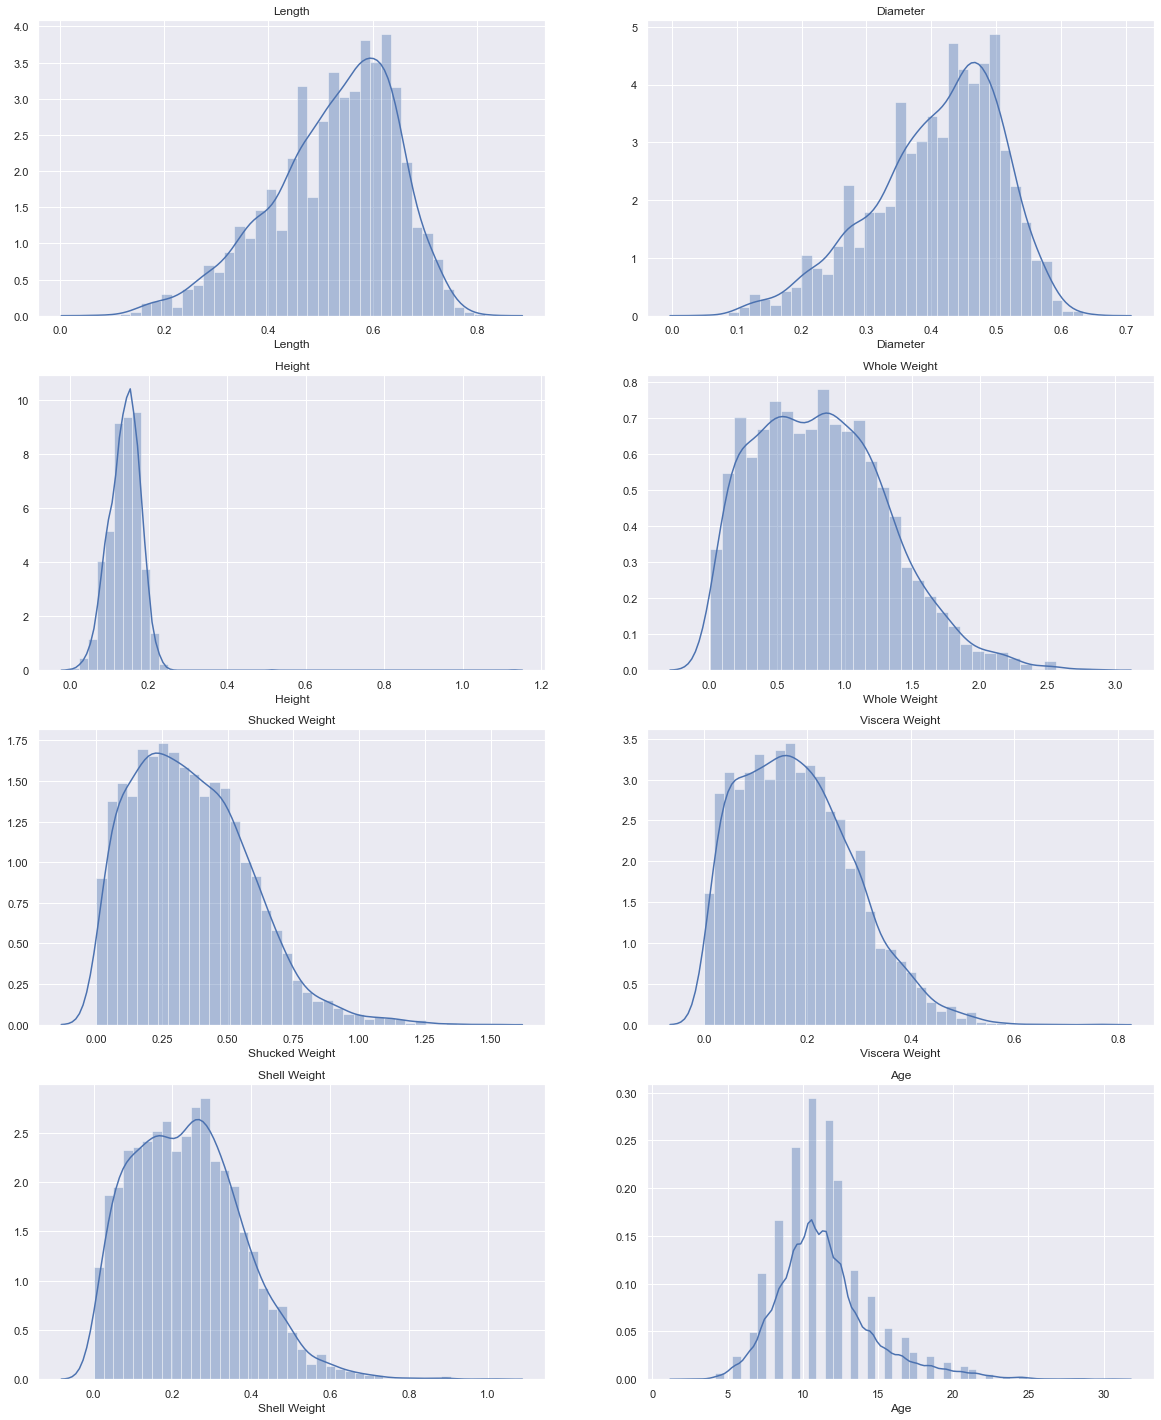

In [7]:
plt.figure(figsize=(20, 25))
plt.subplot(4,2,1)
plt.title('Length')
sns.distplot(data['Length'])

plt.subplot(4,2,2)
plt.title('Diameter')
sns.distplot(data['Diameter'])

plt.subplot(4,2,3)
plt.title('Height')
sns.distplot(data['Height'])

plt.subplot(4,2,4)
plt.title('Whole Weight')
sns.distplot(data['Whole Weight'])

plt.subplot(4,2,5)
plt.title('Shucked Weight')
sns.distplot(data['Shucked Weight'])

plt.subplot(4,2,6)
plt.title('Viscera Weight')
sns.distplot(data['Viscera Weight'])

plt.subplot(4,2,7)
plt.title('Shell Weight')
sns.distplot(data['Shell Weight'])

plt.subplot(4,2,8)
plt.title('Age')
sns.distplot(data['Age'])

Insights from the descriptions, skewness results and plots
- No missing values in the dataset
- All numerical features but 'sex'
- Though features are not normaly distributed, are close to normality
- Each feature has difference scale range
- Inputs are evenly distributed , skewness close to 0 except for Height, followed by Age and Shucked Weight

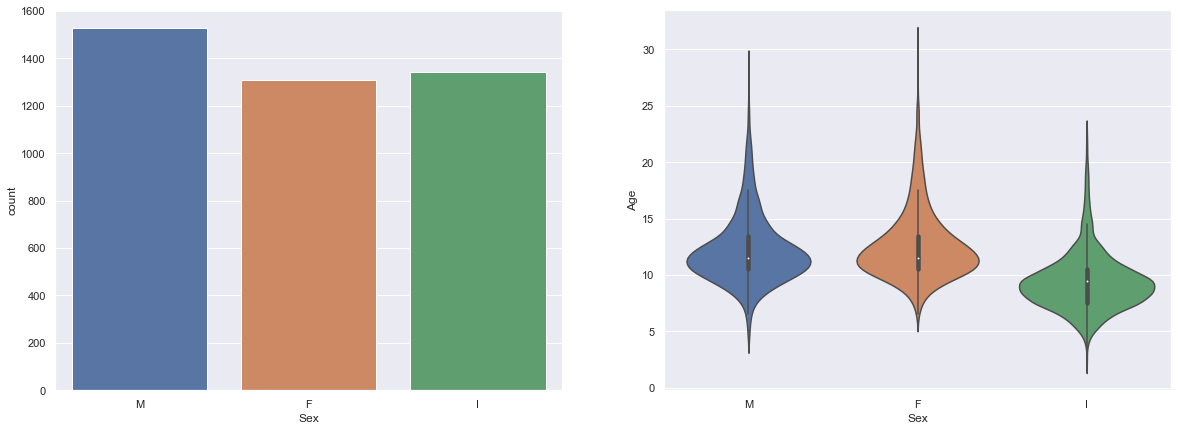

In [8]:
plt.figure(figsize=(20, 7))
plt.subplot(1,2,1)
sns.countplot(x = 'Sex', data = data)
plt.subplot(1,2,2)
sns.violinplot(x = 'Sex', y='Age', data = data)

In [9]:
data.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight','Viscera Weight', 'Shell Weight', 'Age']].mean().sort_values('Age')

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
Sex,,,,,,,,
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304


On the number of abalones in relation to sex
- Male Abalones are more than Infants which are more than Demale abalones in the dataset
- Male abalones age lies in between 7.5 years to 19 years
- Female abalones age lies in between 8 years to 19 years
- Infants abalones age lies in between 6 years to < 10 years

In [10]:
data.corr()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole Weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked Weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera Weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell Weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Age,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


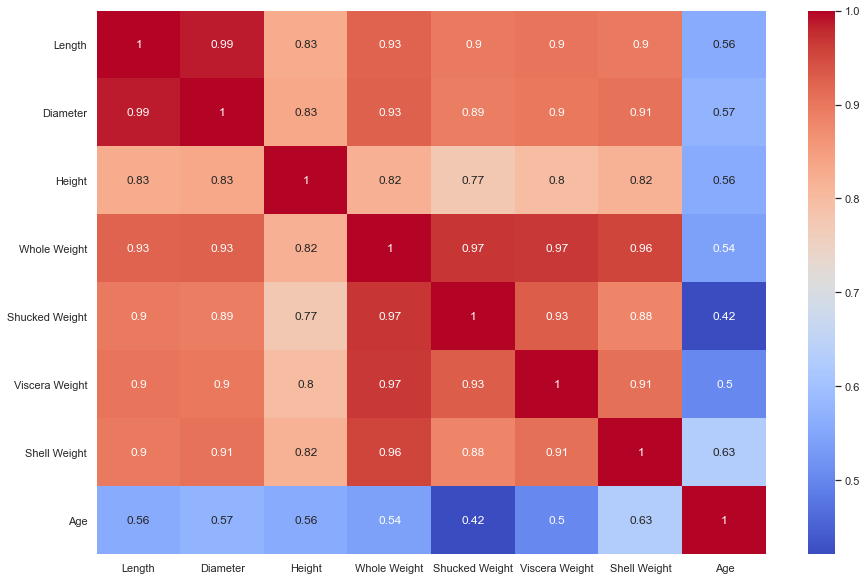

In [11]:
plt.subplots(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap = 'coolwarm')
plt.show()

### Data Outlier Handling

In the dataset description, we notice that there are some outliers at both ends of each physiology of the abalone. <br>
As such we will be removing the outlier to each physiology of the abalone accordingly.

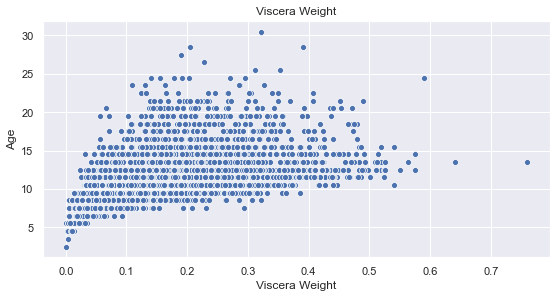

In [12]:
plt.figure(figsize=(20, 20))
plt.subplot(4,2,1)
plt.title('Viscera Weight')
sns.scatterplot(x = data['Viscera Weight'], y = data['Age'])

In the Viscera Weight scatter plot we noticed that majority of the distribution in abalone fall within the age of 25 and have a Viscera Weight of at least 0.6, we were therefore able to identify that the rest are outliers and would therefore drop them. 

In [13]:
# outliers removal for Viscera Weight
data.drop(data[(data['Viscera Weight']> 0.5) & (data['Age'] < 20)].index, inplace=True) # to drop the scatter right of majority
data.drop(data[(data['Viscera Weight']< 0.5) & (data['Age'] > 25)].index, inplace=True) # to drop the scatter above of majority

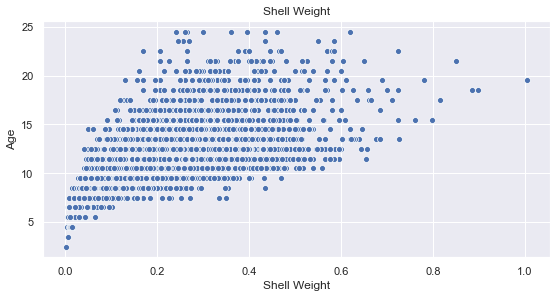

In [14]:
plt.figure(figsize=(20, 20))
plt.subplot(4,2,2)
plt.title('Shell Weight')
sns.scatterplot(x = data['Shell Weight'], y = data['Age'])

We now looked into the scatter plot for Shell Weight and noticed that there are still some outliers most noticeable on the right of the scatter plot. <br>
Similar to Viscera Weight, we are able to identify the outliers and therefore remove them for out modelling. <br>
We will also do so for the rest of the physiology of abalone.

In [15]:
# outliers removal for Shell Weight
data.drop(data[(data['Shell Weight']> 0.6) & (data['Age'] < 25)].index, inplace=True) # to drop the scatter right of majority
data.drop(data[(data['Shell Weight']< 0.8) & (data['Age'] > 25)].index, inplace=True) # to drop remains of right of majority

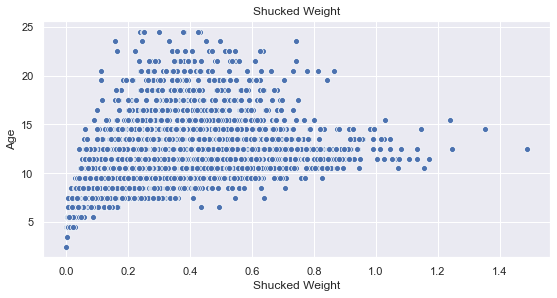

In [16]:
plt.figure(figsize=(20, 20))
plt.subplot(4,2,3)
plt.title('Shucked Weight')
sns.scatterplot(x = data['Shucked Weight'], y = data['Age'])

In [17]:
# outlier removal for Shucked Weight
data.drop(data[(data['Shucked Weight']>= 1) & (data['Age'] < 20)].index, inplace=True) # to drop the scatter above of majority
data.drop(data[(data['Shucked Weight']< 1) & (data['Age'] > 20)].index, inplace=True) # to drop the scatter right of majority

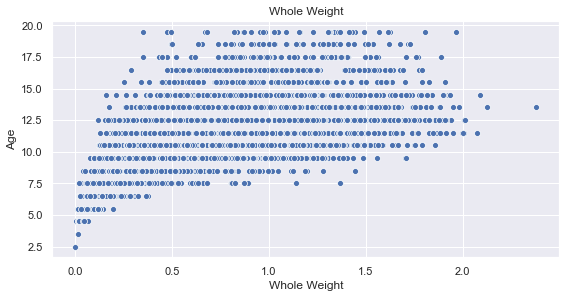

In [18]:
plt.figure(figsize=(20, 20))
plt.subplot(4,2,4)
plt.title('Whole Weight')
sns.scatterplot(x = data['Whole Weight'], y = data['Age'])

In [19]:
#outlier removal for Whole Weight
data.drop(data[(data['Whole Weight']>= 2.5) & (data['Age'] < 25)].index, inplace=True) # to drop the scatter above of majority
data.drop(data[(data['Whole Weight']< 2.5) & (data['Age'] > 25)].index, inplace=True) # to drop the scatter right of majority

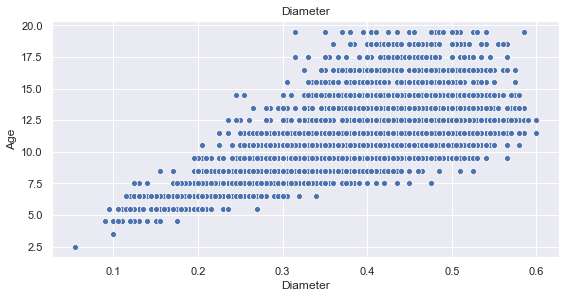

In [20]:
plt.figure(figsize=(20, 20))
plt.subplot(4,2,5)
plt.title('Diameter')
sns.scatterplot(x = data['Diameter'], y = data['Age'])

In [21]:
# Outlier removal for Diameter
data.drop(data[(data['Diameter']< 0.1) & (data['Age'] < 5)].index, inplace=True) # to drop the scatter left of majority
data.drop(data[(data['Diameter']< 0.6) & (data['Age'] > 25)].index, inplace=True) # to drop the scatter above of majority
data.drop(data[(data['Diameter']>= 0.6) & (data['Age']< 25)].index, inplace=True) # to drop the scatter right of majority

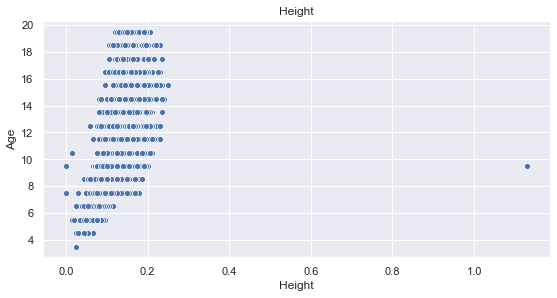

In [22]:
plt.figure(figsize=(20, 20))
plt.subplot(4,2,6)
plt.title('Height')
sns.scatterplot(x = data['Height'], y = data['Age'])

In [23]:
# Outlier removal for Height
data.drop(data[(data['Height']> 0.4) & (data['Age'] < 15)].index, inplace=True) # to drop scatter right of majority
data.drop(data[(data['Height']< 0.4) & (data['Age'] > 25)].index, inplace=True) # to drop scatter above of majority

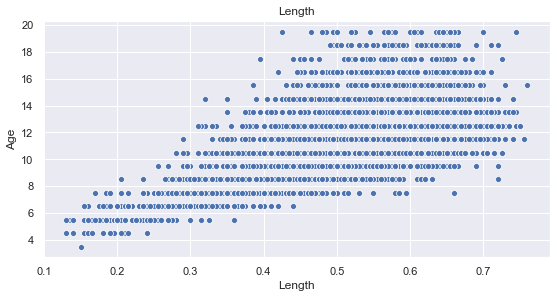

In [24]:
plt.figure(figsize=(20, 20))
plt.subplot(4,2,7)
plt.title('Length')
sns.scatterplot(x = data['Length'], y = data['Age'])

In [25]:
# Outlier removal for Length
data.drop(data[(data['Length']< 0.1) & (data['Age'] < 5)].index, inplace=True) # to drop the scatter left of majority
data.drop(data[(data['Length']< 0.8) & (data['Age'] > 25)].index, inplace=True) # to drop the scatter above of majority
data.drop(data[(data['Length']>= 0.8) & (data['Age']< 25)].index, inplace=True) # to drop the scatter right of majority

### Creating Dummy Variables

In [26]:
# It is extremely important that we drop one of the dummies, alternatively we will introduce multicollinearity
data_with_dummies = pd.get_dummies(data, drop_first=True)

In [27]:
data_with_dummies.head()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5,1,0


### Checkpoint

In [28]:
data_preprocessed = data_with_dummies

In [29]:
data_preprocessed.to_csv('Abalone_preprocessed.csv', index=False)